In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import koreanize_matplotlib

## 쇼핑몰 프로모션 효율 예측 분석 

In [4]:
mem = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/member.csv",encoding="utf-8")
tran = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/transaction.csv",encoding="utf-8")

In [7]:
mem

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0
2,394235,7,Surburban,1,Web,0
3,130152,9,Rural,1,Web,0
4,940352,2,Urban,0,Web,0
...,...,...,...,...,...,...
63995,838295,10,Urban,0,Web,0
63996,547316,5,Urban,1,Phone,0
63997,131575,6,Urban,1,Phone,0
63998,603659,1,Surburban,1,Multichannel,0


In [9]:
tran

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000
2,906145,4,33000
3,184478,4,29000
4,394235,4,33000
...,...,...,...
196831,536246,5,24000
196832,927617,5,26000
196833,927617,3,22000
196834,927617,3,18000


In [83]:
tran_total = tran.groupby("id")[["num_item","total_amount"]].sum()

In [85]:
tran_total

,num_item,total_amount
id,,
100001,7,52000
100008,5,26000
100032,8,62000
100036,15,129000
100070,13,85000
...,...,...
999932,5,32000
999981,8,91000
999990,9,84000


In [89]:
tran_total["mean_amount"] = tran_total["total_amount"] // tran_total["num_item"]

In [91]:
tran_total

,num_item,total_amount,mean_amount
id,,,
100001,7,52000,7428
100008,5,26000,5200
100032,8,62000,7750
100036,15,129000,8600
100070,13,85000,6538
...,...,...,...
999932,5,32000,6400
999981,8,91000,11375
999990,9,84000,9333


In [111]:
frequency = tran["id"].value_counts()

In [115]:
frequency = pd.DataFrame(frequency)

In [116]:
frequency

,count
id,
691067,5
720147,5
422265,5
670720,5
154620,5
...,...
881780,1
154471,1
480462,1


In [126]:
tran_total = tran_total.join(frequency,on="id")

ValueError: columns overlap but no suffix specified: Index(['count'], dtype='object')

In [130]:
tran_total.rename(columns={"count": "frequency"}, inplace=True)

In [132]:
tran_total

,num_item,total_amount,mean_amount,frequency
id,,,,
100001,7,52000,7428,2
100008,5,26000,5200,1
100032,8,62000,7750,3
100036,15,129000,8600,5
100070,13,85000,6538,4
...,...,...,...,...
999932,5,32000,6400,1
999981,8,91000,11375,4
999990,9,84000,9333,3


In [135]:
data = pd.merge(mem,tran_total,on="id",how="inner")

In [137]:
data["zip_code"].value_counts()

zip_code
Surburban    28776
Urban        25661
Rural         9563
Name: count, dtype: int64

In [141]:
c_ratio(data.groupby("zip_code")["conversion"].value_counts(sort=False))

('Rural', 1) 18.81%
('Surburban', 1) 13.99%
('Urban', 1) 13.90%


<Axes: xlabel='zip_code'>

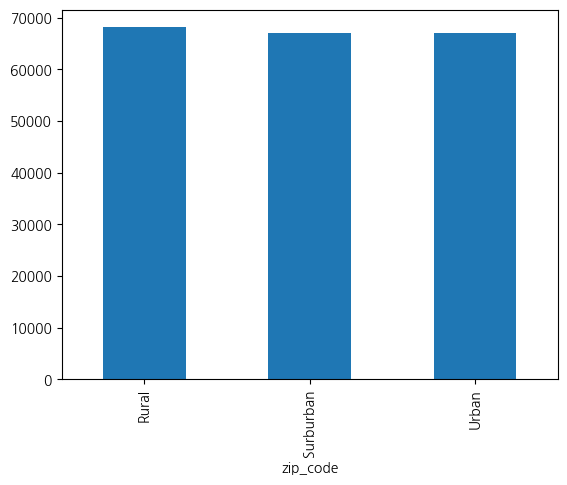

In [146]:
data.groupby("zip_code")["total_amount"].mean().sort_values(ascending=False).plot(kind="bar")

In [149]:
data.groupby("zip_code")[["num_item","total_amount","frequency"]].mean()

,num_item,total_amount,frequency
zip_code,,,
Rural,9.677298,68149.325525,3.109380
Surburban,9.438873,67007.541006,3.068529
Urban,9.421924,66965.706714,3.070847


In [150]:
data["channel"].value_counts()

channel
Web             28217
Phone           28021
Multichannel     7762
Name: count, dtype: int64

In [158]:
data.groupby("channel")[["num_item","total_amount","frequency"]].mean()

,num_item,total_amount,frequency
channel,,,
Multichannel,9.473718,67182.169544,3.063772
Phone,9.416937,66936.155027,3.073445
Web,9.516462,67379.310345,3.080909


In [157]:
c_ratio(data.groupby("channel")["conversion"].value_counts())

('Multichannel', 1) 17.17%
('Phone', 1) 12.72%
('Web', 1) 15.94%


In [162]:
c_ratio(data.groupby("is_referral")["conversion"].value_counts())

(0, 1) 17.31%
(1, 1) 12.07%


In [164]:
data1 = pd.get_dummies(data,columns=["zip_code","channel"],drop_first=True)

In [165]:
data1.head()

,id,recency,is_referral,conversion,num_item,total_amount,mean_amount,frequency,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
0,906145,10,0,0,10,94000,9400,3,True,False,True,False
1,184478,6,1,0,4,29000,7250,1,False,False,False,True
2,394235,7,1,0,8,41000,5125,2,True,False,False,True
3,130152,9,1,0,7,83000,11857,4,False,False,False,True
4,940352,2,0,0,3,31000,10333,1,False,True,False,True


In [180]:
X

,recency,is_referral,num_item,total_amount,mean_amount,frequency,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
0,10,0,10,94000,9400,3,True,False,True,False
1,6,1,4,29000,7250,1,False,False,False,True
2,7,1,8,41000,5125,2,True,False,False,True
3,9,1,7,83000,11857,4,False,False,False,True
4,2,0,3,31000,10333,1,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...
63995,10,0,14,104000,7428,4,False,True,False,True
63996,5,1,9,89000,9888,5,False,True,True,False
63997,6,1,8,61000,7625,2,False,True,True,False
63998,1,1,16,108000,6750,5,True,False,False,False


In [168]:
X = data1.drop(["id","conversion"],axis=1)
y = data["conversion"]

In [171]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [185]:
sts = MinMaxScaler()
X_mx_scaled = sts.fit_transform(X)
sts2 = StandardScaler()
X_std_scaled = sts2.fit_transform(X)

In [186]:
X_mx_scaled

array([[0.81818182, 0.        , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.45454545, 1.        , 0.11111111, ..., 0.        , 0.        ,
        1.        ],
       [0.54545455, 1.        , 0.25925926, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.45454545, 1.        , 0.25925926, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 1.        , 0.55555556, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.59259259, ..., 0.        , 0.        ,
        1.        ]])

In [187]:
X_mx_scaled = pd.DataFrame(X_mx_scaled,columns=X.columns)

In [188]:
X_mx_scaled

,recency,is_referral,num_item,total_amount,mean_amount,frequency,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
0,0.818182,0.0,0.333333,0.488636,0.233533,0.50,1.0,0.0,1.0,0.0
1,0.454545,1.0,0.111111,0.119318,0.169162,0.00,0.0,0.0,0.0,1.0
2,0.545455,1.0,0.259259,0.187500,0.105539,0.25,1.0,0.0,0.0,1.0
3,0.727273,1.0,0.222222,0.426136,0.307096,0.75,0.0,0.0,0.0,1.0
4,0.090909,0.0,0.074074,0.130682,0.261467,0.00,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
63995,0.818182,0.0,0.481481,0.545455,0.174491,0.75,0.0,1.0,0.0,1.0
63996,0.363636,1.0,0.296296,0.460227,0.248144,1.00,0.0,1.0,1.0,0.0
63997,0.454545,1.0,0.259259,0.301136,0.180389,0.25,0.0,1.0,1.0,0.0
63998,0.000000,1.0,0.555556,0.568182,0.154192,1.00,1.0,0.0,0.0,0.0


In [189]:
X_std_scaled = pd.DataFrame(X_std_scaled,columns=X.columns)

In [190]:
X_std_scaled

,recency,is_referral,num_item,total_amount,mean_amount,frequency,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
0,1.207751,-1.00451,0.105664,0.797515,0.295355,-0.054589,1.106380,-0.818119,1.133138,-0.888008
1,0.067359,0.99551,-1.085368,-1.133973,-0.195694,-1.499455,-0.903849,-0.818119,-0.882505,1.126116
2,0.352457,0.99551,-0.291347,-0.777391,-0.681032,-0.777022,1.106380,-0.818119,-0.882505,1.126116
3,0.922653,0.99551,-0.489852,0.470648,0.856521,0.667844,-0.903849,-0.818119,-0.882505,1.126116
4,-1.073034,-1.00451,-1.283873,-1.074543,0.508447,-1.499455,-0.903849,1.222316,-0.882505,1.126116
...,...,...,...,...,...,...,...,...,...,...
63995,1.207751,-1.00451,0.899685,1.094668,-0.155039,0.667844,-0.903849,1.222316,-0.882505,1.126116
63996,-0.217739,0.99551,-0.092842,0.648939,0.406812,1.390277,-0.903849,1.222316,1.133138,-0.888008
63997,0.067359,0.99551,-0.291347,-0.183087,-0.110046,-0.777022,-0.903849,1.222316,1.133138,-0.888008
63998,-1.358132,0.99551,1.296695,1.213528,-0.309891,1.390277,1.106380,-0.818119,-0.882505,-0.888008


In [191]:
from sklearn.model_selection import train_test_split

In [200]:
# Standard 스케일링 셋 

X_train2,X_test2,y_train2,y_test2 = train_test_split(X_std_scaled,y,test_size=0.3,random_state=10)

X_valid2,X_test2,y_valid2,y_test2 = train_test_split(X_test2,y_test2,test_size=0.5,random_state=10) 


# 데이터 양이 많기 때문에 
# 학습 6 : 검증 2 : 테스트 2 비율로 나눈다 

In [196]:
X_test

,recency,is_referral,num_item,total_amount,mean_amount,frequency,zip_code_Surburban,zip_code_Urban,channel_Phone,channel_Web
33026,0.000000,0.0,0.444444,0.511364,0.177784,0.75,1.0,0.0,0.0,0.0
12726,0.181818,0.0,0.444444,0.812500,0.299850,1.00,1.0,0.0,0.0,0.0
25727,0.818182,1.0,0.222222,0.284091,0.200150,0.50,0.0,1.0,1.0,0.0
54308,0.090909,0.0,0.148148,0.068182,0.071856,0.00,0.0,1.0,1.0,0.0
32497,0.181818,1.0,0.037037,0.096591,0.326347,0.00,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1846,0.090909,1.0,0.185185,0.079545,0.061856,0.25,0.0,0.0,1.0,0.0
10602,0.545455,0.0,0.518519,0.693182,0.211557,1.00,0.0,0.0,1.0,0.0
43618,0.090909,0.0,0.222222,0.176136,0.118892,0.25,0.0,0.0,0.0,0.0
30518,0.727273,0.0,0.296296,0.517045,0.281437,1.00,0.0,1.0,0.0,1.0


In [201]:
# minmax 스케일링

X_train,X_test,y_train,y_test = train_test_split(X_mx_scaled,y,test_size=0.3,random_state=10)

X_valid,X_test,y_valid,y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=10) 


# 데이터 양이 많기 때문에 
# 학습 6 : 검증 2 : 테스트 2 비율로 나눈다 

## 랜덤포레스트

In [202]:
from sklearn.ensemble import RandomForestClassifier

In [203]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix #결과 

In [207]:
y.value_counts()

conversion
0    54606
1     9394
Name: count, dtype: int64

In [205]:
rfc_mx = RandomForestClassifier(n_estimators=100,max_depth=3,n_jobs=-1,random_state=10)
rfc_mx.fit(X_train2,y_train2)
rfc_pred = rfc_mx.predict(X_valid2)
print(accuracy_score(y_valid2,rfc_pred))
print(classification_report(y_valid2,rfc_pred))
print(confusion_matrix(y_valid2,rfc_pred))

0.8496875
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8157
           1       0.00      0.00      0.00      1443

    accuracy                           0.85      9600
   macro avg       0.42      0.50      0.46      9600
weighted avg       0.72      0.85      0.78      9600

[[8157    0]
 [1443    0]]


C:\Users\hi\anaconda3\envs\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hi\anaconda3\envs\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hi\anaconda3\envs\myvenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [208]:
from sklearn.linear_model import LogisticRegression #로지스틱 회귀분석 

In [209]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_valid)
print(confusion_matrix(y_valid,lr_pred))
print(accuracy_score(y_valid,lr_pred))
print(classification_report(y_valid,lr_pred))

[[8089   68]
 [1295  148]]
0.8580208333333333
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8157
           1       0.69      0.10      0.18      1443

    accuracy                           0.86      9600
   macro avg       0.77      0.55      0.55      9600
weighted avg       0.84      0.86      0.81      9600



In [211]:
from xgboost import XGBClassifier

In [212]:
xgb_mx = XGBClassifier(n_jobs=-1,n_estimators= 1000,random_state=10,learning_rate=0.01)
xgb_mx.fit(X_train,y_train)
pred_xgb_mx = xgb_mx.predict(X_valid)
print(accuracy_score(y_valid,pred_xgb_mx))
print(classification_report(y_valid,pred_xgb_mx))

0.8638541666666667
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      8157
           1       0.73      0.15      0.25      1443

    accuracy                           0.86      9600
   macro avg       0.80      0.57      0.59      9600
weighted avg       0.85      0.86      0.82      9600



In [213]:
xgb_std = XGBClassifier(n_jobs=-1,n_estimators= 1000,random_state=10,learning_rate=0.01)
xgb_std.fit(X_train2,y_train2)
pred_xgb_std = xgb_std.predict(X_valid2)
print(accuracy_score(y_valid2,pred_xgb_std))
print(classification_report(y_valid2,pred_xgb_std))

0.8638541666666667
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      8157
           1       0.73      0.15      0.25      1443

    accuracy                           0.86      9600
   macro avg       0.80      0.57      0.59      9600
weighted avg       0.85      0.86      0.82      9600



## 하이퍼 파라미터 튜닝 

## 그리드 서치 
* manual Search에 비해, Grid Search는 체계적인 방식으로 하이퍼 파라미터 최적화를 수행한다
* 그리드 서치는 모든 parameter의 경우의 수에 대해 Corss-validation 결과가 가장 좋은 parameter를 고르는 방법 
* 전체 탐색 구간, 분석가의 지정이 필요하나 균등하고 전역적인 탐색이 가능하다는 장점이 있음. 
* 단, 하이퍼파라미터의 갯수가 많아질수록 전체 탐색시간이 기하급수적으로 증가한다는 단점이 있음.


In [225]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [215]:
params = dict(max_depth=[3,5,10],n_estimators=[100,500,1000],learning_rate=[0.01,0.05,0.1])
params

{'max_depth': [3, 5, 10],
 'n_estimators': [100, 500, 1000],
 'learning_rate': [0.01, 0.05, 0.1]}

In [223]:
grid = GridSearchCV(xgb_mx,param_grid=params,cv=5,n_jobs=-1,verbose=3)
grid.fit(X_train,y_train)
grid_pred = grid.predict(X_valid)
print(sorted(grid.cv_results_.keys()))
print('최적하이퍼 파라미터: ', grid.best_params_)
print(f'최고예측 정확도:{grid.best_score_:.4f}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적하이퍼 파라미터:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}
최고예측 정확도:0.8673


In [224]:
xgb_std = XGBClassifier(max_depth=3,n_jobs=-1,n_estimators= 1000,random_state=10,learning_rate=0.05)
xgb_std.fit(X_train2,y_train2)
pred_xgb_std = xgb_std.predict(X_valid2)
print(accuracy_score(y_valid2,pred_xgb_std))
print(classification_report(y_valid2,pred_xgb_std))

0.8639583333333334
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      8157
           1       0.72      0.15      0.25      1443

    accuracy                           0.86      9600
   macro avg       0.80      0.57      0.59      9600
weighted avg       0.85      0.86      0.82      9600



## 랜덤서치 
* GridSearch가 전수조사라면 RandomSearch 표본조사 
* 하이퍼파라미터 값을 랜덤 샘플링을 해서 선정 
* RandomSearch는 GridSearch에 비해 불필요한 반복 수행 횟수를 대폭 줄이면서 동시에 정해진 간격 사이에 위치하는 값들에 대해서도 확률적으로 탐색이 가능하므로 최적 하이퍼 파라미터를 더 빨리 찾을 수 있다.

In [227]:
rand_cv = RandomizedSearchCV(xgb_mx,param_distributions=params,n_iter=30,cv=5,n_jobs=-1,verbose=3)
rand_cv.fit(X_train,y_train)
rand_pred = rand_cv.predict(X_valid)

print(sorted(rand_cv.cv_results_.keys()))
print('최적하이퍼 파라미터: ', rand_cv.best_params_)
print(f'최고예측 정확도:{rand_cv.best_score_:.4f}')

C:\Users\hi\anaconda3\envs\myvenv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 27 is smaller than n_iter=30. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 27 candidates, totalling 135 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적하이퍼 파라미터:  {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05}
최고예측 정확도:0.8673


## 베이지안 옵티마이저 
* Bayesian Optimization은 베이즈 정리에 의해서 사후 확률을 통해 최적값을 예측해서 최적 파라미터를 업데이트하는 옵티마이저 

In [228]:
from skopt import BayesSearchCV 

In [242]:
bocv = BayesSearchCV(xgb_mx,search_spaces=params,cv=5,n_jobs=-1,verbose=3)
bocv.fit(X_train,y_train)
print(f"val_score : {bocv.best_score_:.4f}")
print(f"test_score: {bocv.score(X_valid,y_valid)}")
print(f"최적 하이퍼 파라미터 : {bocv.best_params_}")

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [238]:
y_train

53187    0
32554    0
54789    1
59643    0
34362    0
        ..
28017    0
50496    0
29199    0
40061    0
17673    0
Name: conversion, Length: 44800, dtype: int64

In [243]:
y.value_counts()

conversion
0    54606
1     9394
Name: count, dtype: int64

# 자료증폭 SMOTE 

In [244]:
from imblearn.over_sampling import SMOTE

In [255]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train,y_train)

In [246]:
y_res.value_counts() #개수가 같아졌다

conversion
0    54606
1    54606
Name: count, dtype: int64

In [256]:
X_train_smt,X_test_smt,y_train_smt,y_test_smt = train_test_split(X_res,y_res,test_size=0.4,random_state=10)

In [257]:
rand_cv = RandomizedSearchCV(xgb_mx,param_distributions=params,n_iter=30,cv=5,n_jobs=-1,verbose=3)
rand_cv.fit(X_train_smt,y_train_smt)
rand_pred = rand_cv.predict(X_test_smt)

print(sorted(rand_cv.cv_results_.keys()))
print('최적하이퍼 파라미터: ', rand_cv.best_params_)
print(f'최고예측 정확도:{rand_cv.best_score_:.4f}')

C:\Users\hi\anaconda3\envs\myvenv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 27 is smaller than n_iter=30. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 27 candidates, totalling 135 fits
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
최적하이퍼 파라미터:  {'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1}
최고예측 정확도:0.8794


In [258]:
xgb_mx = XGBClassifier(n_jobs=-1,n_estimators= 500,max_depth=10,learning_rate=0.1)
xgb_mx.fit(X_train_smt,y_train_smt)
pred_xgb_mx_smt = xgb_mx.predict(X_test_smt)
print(accuracy_score(y_test_smt,pred_xgb_mx_smt))
print(classification_report(y_test_smt,pred_xgb_mx_smt))

0.887411376482504
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     15298
           1       0.92      0.85      0.88     15309

    accuracy                           0.89     30607
   macro avg       0.89      0.89      0.89     30607
weighted avg       0.89      0.89      0.89     30607



In [251]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import MiniBatchKMeans

In [252]:
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42
)

X_res2, y_res2 = cc.fit_resample(X, y)

In [254]:
y_res2.value_counts()

conversion
0    9394
1    9394
Name: count, dtype: int64

In [198]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44800 entries, 53187 to 17673
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   recency             44800 non-null  float64
 1   is_referral         44800 non-null  float64
 2   num_item            44800 non-null  float64
 3   total_amount        44800 non-null  float64
 4   mean_amount         44800 non-null  float64
 5   frequency           44800 non-null  float64
 6   zip_code_Surburban  44800 non-null  float64
 7   zip_code_Urban      44800 non-null  float64
 8   channel_Phone       44800 non-null  float64
 9   channel_Web         44800 non-null  float64
dtypes: float64(10)
memory usage: 3.8 MB


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_mx_scaled,y,test_size=0.3,random_state=10)

## 쇼핑몰 고객 데이터, 프로모션 쿠폰을 발행하고, 사용 여부 데이터를 수집 
* mem : 고객id,최근 방문일, 사는 지역, 추천여부, 주요접속채널 , 쿠폰 사용 여부 
* tran: 고객id , 구매수량 , 총구매금액 
* 전통적 마케팅 기법인 RFM기법(우수고객 판별) 활용 고객 데이터에서 파생변수 생성 후 분석 
* Recency : 현재일 - 최근 구매일 
* Frequency : 구매빈도 
* Monetary : 구매금액


In [27]:
df1 = pd.merge(mem, tran, on='id', how='left')

In [35]:
df1.head()

,id,recency,zip_code,is_referral,channel,conversion,num_item,total_amount
0,906145,10,Surburban,0,Phone,0,5,34000
1,906145,10,Surburban,0,Phone,0,1,27000
2,906145,10,Surburban,0,Phone,0,4,33000
3,184478,6,Rural,1,Web,0,4,29000
4,394235,7,Surburban,1,Web,0,4,33000


In [36]:
df1.describe()

,id,recency,is_referral,conversion,num_item,total_amount
count,196836.000000,196836.000000,196836.000000,196836.000000,196836.000000,196836.000000
mean,550557.552932,5.753739,0.501483,0.166321,3.078365,21837.102969
std,259254.795613,3.508775,0.499999,0.372370,1.478408,8218.005565
min,100001.000000,1.000000,0.000000,0.000000,1.000000,8000.000000
25%,326719.000000,2.000000,0.000000,0.000000,2.000000,15000.000000
50%,550918.000000,5.000000,1.000000,0.000000,3.000000,22000.000000
75%,774916.000000,9.000000,1.000000,0.000000,4.000000,29000.000000
max,999997.000000,12.000000,1.000000,1.000000,6.000000,38000.000000


## 최근 구매일

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            196836 non-null  int64 
 1   recency       196836 non-null  int64 
 2   zip_code      196836 non-null  object
 3   is_referral   196836 non-null  int64 
 4   channel       196836 non-null  object
 5   conversion    196836 non-null  int64 
 6   num_item      196836 non-null  int64 
 7   total_amount  196836 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 12.0+ MB


In [48]:
df1.head()

,id,recency,zip_code,is_referral,channel,conversion,num_item,total_amount
0,906145,10,Surburban,0,Phone,0,5,34000
1,906145,10,Surburban,0,Phone,0,1,27000
2,906145,10,Surburban,0,Phone,0,4,33000
3,184478,6,Rural,1,Web,0,4,29000
4,394235,7,Surburban,1,Web,0,4,33000


In [70]:
df1.groupby("zip_code")["recency"].value_counts(sort=False)

zip_code   recency
Rural      1           4399
           2           3359
           3           2776
           4           2348
           5           2075
           6           2169
           7           1906
           8           1675
           9           2989
           10          3405
           11          1561
           12          1073
Surburban  1          12000
           2          10477
           3           8130
           4           6796
           5           6339
           6           6356
           7           5690
           8           4824
           9           8950
           10         10496
           11          4957
           12          3285
Urban      1          11188
           2           9592
           3           7166
           4           6464
           5           5604
           6           5601
           7           4890
           8           4206
           9           7779
           10          9203
           11          4228
 

In [73]:
df1.groupby("channel")["recency"].value_counts(sort=False)

channel       recency
Multichannel  1           5048
              2           3647
              3           2417
              4           2002
              5           1777
              6           1651
              7           1225
              8           1022
              9           1800
              10          1854
              11           840
              12           498
Phone         1          11257
              2           9909
              3           7932
              4           6665
              5           5991
              6           6246
              7           5631
              8           4722
              9           8946
              10         10435
              11          4963
              12          3424
Web           1          11282
              2           9872
              3           7723
              4           6941
              5           6250
              6           6229
              7           5630
              8  

In [55]:
df1.groupby("zip_code")["conversion"].value_counts()

zip_code   conversion
Rural      0             23462
           1              6273
Surburban  0             74223
           1             14077
Urban      0             66413
           1             12388
Name: count, dtype: int64

In [56]:
def c_ratio(x):
    for idx,item in zip(x.index,x):
        if idx[1] == 0:
            unconv = item 
        else :
            conv = item
            class_ratio = conv / (conv+unconv) * 100 
            print(idx,f'{class_ratio:.2f}%')

In [58]:
c_ratio(df1.groupby("zip_code")["conversion"].value_counts())

('Rural', 1) 21.10%
('Surburban', 1) 15.94%
('Urban', 1) 15.72%


In [60]:
df1.groupby("zip_code")["is_referral"].value_counts()

zip_code   is_referral
Rural      0              15005
           1              14730
Surburban  1              44373
           0              43927
Urban      1              39607
           0              39194
Name: count, dtype: int64

In [62]:
c_ratio(df1.groupby("zip_code")["is_referral"].value_counts())

('Rural', 1) 49.54%
('Surburban', 1) 74.73%
('Urban', 1) 47.41%


In [65]:
df1.groupby("channel")["conversion"].value_counts()

channel       conversion
Multichannel  0             19123
              1              4658
Phone         0             73728
              1             12393
Web           0             71247
              1             15687
Name: count, dtype: int64

In [74]:
c_ratio(df1.groupby("channel")["conversion"].value_counts())

('Multichannel', 1) 19.59%
('Phone', 1) 14.39%
('Web', 1) 18.04%


<Axes: xlabel='zip_code'>

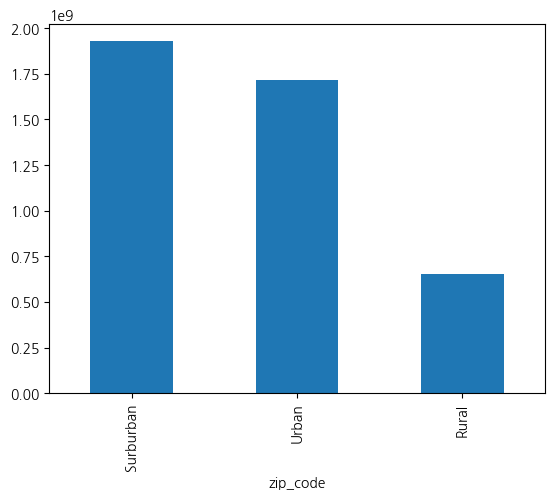

In [79]:
df1.groupby("zip_code")["total_amount"].sum().sort_values(ascending=False).plot(kind="bar")

In [87]:
df1.groupby("id")[["num_item","total_amount"]].sum()

,num_item,total_amount
id,,
100001,7,52000
100008,5,26000
100032,8,62000
100036,15,129000
100070,13,85000
...,...,...
999932,5,32000
999981,8,91000
999990,9,84000
